# Tremor Processor

In [1]:
import pdkit

/Users/juansaez/Code/test_pdkit/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 1. Let's explore the methods of the tremor processor first

## load data

In [18]:
filename = './data/2458/T_-_KINETIC_TREMOR_OF_HANDS_-_LEFT_HAND_-_2016-10-14_10-46-33_-_f73512ccfc_-_2458.csv'

In [19]:
ts = pdkit.TremorTimeSeries().load(filename)
tp = pdkit.TremorProcessor()

,td,x,y,z,mag_sum_acc
1970-01-01 00:00:00.000000000,0.000000,-0.278925,4.547786,4.137180,6.154382
1970-01-01 00:00:00.009998907,0.009999,-0.221464,5.111620,3.189077,6.028924
1970-01-01 00:00:00.020002917,0.020003,-0.166397,5.600038,2.433706,6.108276
1970-01-01 00:00:00.029993021,0.029993,-0.107739,6.030994,1.794454,6.293216
1970-01-01 00:00:00.039996511,0.039997,-0.014365,6.400899,1.229423,6.517913
1970-01-01 00:00:00.049998542,0.049999,0.125696,6.742072,0.733823,6.783055
1970-01-01 00:00:00.059990417,0.059990,0.265756,7.026982,0.253785,7.036584
1970-01-01 00:00:00.069977188,0.069977,0.365116,7.272387,-0.189142,7.284003
1970-01-01 00:00:00.080035313,0.080035,0.440533,7.486669,-0.638055,7.526712
1970-01-01 00:00:00.089998854,0.089999,0.501585,7.665037,-1.092953,7.758796


## resample the data frame

In [20]:
resampled_data_frame = tp.resample_signal(ts)
resampled_data_frame.head(10)

,td,x,y,z,mag_sum_acc
1970-01-01 00:00:00.000,0.004999,-0.250194,4.829703,3.663129,6.154382
1970-01-01 00:00:00.010,0.014999,-0.193631,5.322610,2.888604,6.028932
1970-01-01 00:00:00.020,0.024998,-0.137068,5.815516,2.114080,6.108253
1970-01-01 00:00:00.030,0.039997,-0.014365,6.400899,1.229423,6.293372
1970-01-01 00:00:00.040,0.049999,0.125696,6.742072,0.733823,6.518005
1970-01-01 00:00:00.050,0.059990,0.265756,7.026982,0.253785,6.783092
1970-01-01 00:00:00.060,0.069977,0.365116,7.272387,-0.189142,7.036821
1970-01-01 00:00:00.070,0.077497,0.418087,7.424120,-0.527323,7.284554
1970-01-01 00:00:00.080,0.085017,0.471059,7.575853,-0.865504,7.525860
1970-01-01 00:00:00.090,0.099995,0.553061,7.812280,-1.511938,7.758821


## plot the original/resampled data 

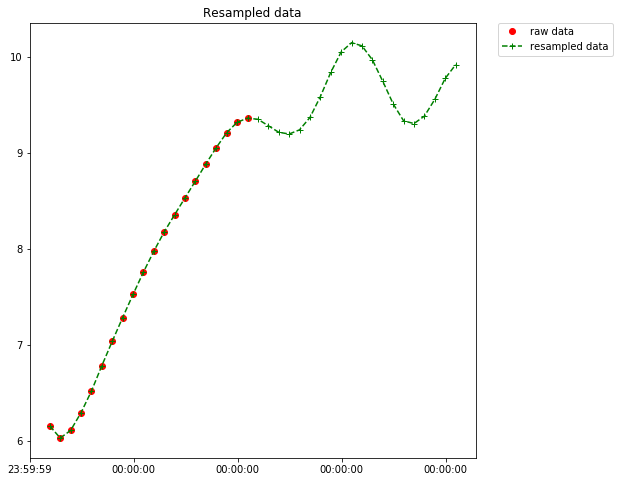

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.title('Resampled data')
plt.plot(ts.index[0:20], ts.mag_sum_acc[0:20], 'or', label="raw data")
plt.plot(resampled_data_frame.index[0:40], resampled_data_frame.mag_sum_acc[0:40], '--+g', label="resampled data")
# plt.plot(df_resampled.index[0:110], df_resampled.mag_sum_acc[0:110], '-g')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x116d23550>],
      dtype=object)

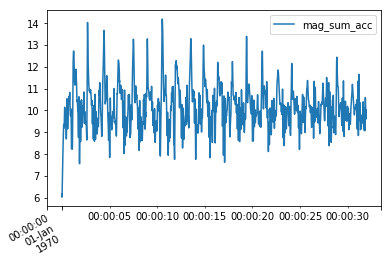

In [22]:
resampled_data_frame.loc[:,['mag_sum_acc']].plot(subplots=True)

## high pass filter the data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x116e40a58>],
      dtype=object)

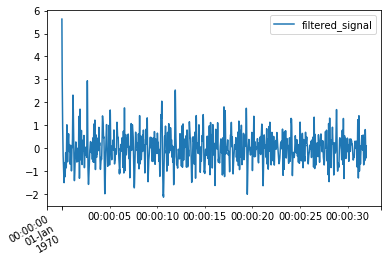

In [23]:
filtered_data_frame = tp.filter_signal(resampled_data_frame)
filtered_data_frame.loc[:,['filtered_signal']].plot(subplots=True)

## Fast Fourier Transform on the data 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117a72b00>],
      dtype=object)

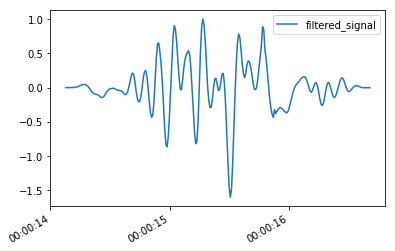

In [24]:
fft_data_frame = tp.fft_signal(filtered_data_frame)
fft_data_frame.loc[:,['filtered_signal']].plot(subplots=True)

## calculate tremor amplitude, frequency

In [26]:
amplitude, frequency = tp.amplitude_by_fft(fft_data_frame)
print('Tremor amplitude: ', amplitude, ', frequency: ', frequency)

Tremor amplitude:  0.9703510281208805 , frequency:  7.8125


## 2. Use Tremor processor now

In [32]:
ts = pdkit.TremorTimeSeries().load(filename)
tp = pdkit.TremorProcessor()

amplitude, frequency = tp.amplitude(ts)
print('Tremor amplitude: ', amplitude, ', frequency: ', frequency)

Tremor amplitude:  0.9703510281208805 , frequency:  7.8125


## 3. Bradykinesia

In [30]:
# Bradykinesia
tp = pdkit.TremorProcessor(lower_frequency=0.0, upper_frequency=4.0)

amplitude, frequency = tp.bradykinesia(ts)
print('Bradykinesia amplitude: ', amplitude, ', frequency: ', frequency)

Bradykinesia amplitude:  0.4092354137761556 , frequency:  7.8125
